# MOwNiT 

# Laboratorium 4

## Interpolacja Hermite'a

Interpolacja Hermite’a umożliwia znalezienie wielomianu interpolacyjnego zadanej funkcji w przypadku, gdy oprócz wartości funkcji w pewnych punktach $x_1,...,x_n$ dane są również wartości jej pochodnych, tzn. znamy

$$f(x_{1}),f(x_{2}),\ldots ,f(x_{n})$$

oraz

$$f'(x_{1}),\ldots ,f^{(k_{1})}(x_{1}),f'(x_2),\ldots,f^{(k_2)}(x_2)\ldots ,f'(x_{n}),\ldots ,f^{(k_{n})}(x_{n})$$

Jeżeli w danym punkcie $x_j$ znamy wyłącznie wartość funkcji, to punkt $(x_j,f(x_j))$ nazywamy *węzłem jednokrotnym*, natomiast jeżeli znamy wartości pochodnych aż do $k$-tej włącznie, to punkt $(x_j,f(x_j))$ nazywamy *węzłem $k+1$ krotnym*.

### Algorytm - teoria

Konstruujemy macierz węzłów w taki sposób, że węzęł $k$-krotny powtarzamy dokładnie $k$ razy:

$$\left[\begin{array}{c}
x_1&f(x_1)\\
x_1&f(x_1)\\
x_1&f(x_1)\\
\vdots\\
x_1&f(x_1)\\
x_2&f(x_2)\\
x_2&f(x_2)\\
\vdots\\
x_2&f(x_2)\\
\vdots\\
x_n&f(x_n)\\
x_n&f(x_n)\\
\vdots\\
x_n&f(x_n)
\end{array}\right]$$

Następnie uzupełniamy naszą macierz o kolejną kolumnę zawierającą *różnice dzielone pierwszego rzędu*$$f[x_{i-1},x_{i}]:=\frac{f(x_{i})-f(x_{i-1})}{x_{i}-x_{i-1}}.$$ Tam, gdzie nie możemy obliczyć różnicy dzielonej (obecny i poprzedni punkt jest taki sam) wstawiamy $$\frac{f'(x_i)}{1!}.$$

$$\left[\begin{array}{cc}
x_1&f(x_1)&-\\
x_1&f(x_1)&f'(x_1)\\
x_1&f(x_1)&f'(x_1)\\
\vdots&\vdots\\
x_1&f(x_1)&f'(x_1)\\
x_2&f(x_2)&f[x_1,x_2]\\
x_2&f(x_2)&f'(x_2)\\
\vdots&\vdots\\
x_2&f(x_2)&f'(x_2)\\
\vdots&\vdots\\
x_n&f(x_n)&f[x_{n-1},x_n]\\
x_n&f(x_n)&f'(x_n)\\
\vdots&\vdots\\
x_n&f(x_n)&f'(x_n)
\end{array}\right]$$

W kolejnym kroku uzupełniamy macierz o kolumnę *różnic dzielonych drugiego rzędu* $$f[x_{i-2},x_{i-1},x_i]=\frac{f[x_{i-1},x_i]-f[x_{i-2},x_{i-1}]}{x_i-x_{i-2}}$$

Jeżeli $f[x_{i-1},x_i]$ lub $f[x_{i-2},x_{i-1}]$ nie istniała, to do wzoru wstawiamy zastępującą ją pochodną.

Jeżeli nie jesteśmy wstanie obliczyć różnicy dzielonej drugiego rzędu (dwa poprzednie punkty są takie same, jak aktualny), to wstawiamy $$\frac{f''(x_i)}{2!}.$$

$$\left[\begin{array}{ccc}
x_1&f(x_1)&-&-\\
x_1&f(x_1)&f'(x_1)&-\\
x_1&f(x_1)&f'(x_1)&\frac{f''(x_1)}{2}\\
\vdots&\vdots&\vdots\\
x_1&f(x_1)&f'(x_1)&\frac{f''(x_1)}{2}\\
x_2&f(x_2)&f[x_1,x_2]&f[x_1,x_1,x_2]\\
x_2&f(x_2)&f'(x_2)&f[x_1,x_2,x_2]\\
\vdots&\vdots&\vdots\\
x_2&f(x_2)&f'(x_2)&\frac{f''(x_1)}{2}\\
\vdots&\vdots&\vdots\\
x_n&f(x_n)&f[x_{n-1},x_n]&f[x_{n-1},x_{n-1},x_n]\\
x_n&f(x_n)&f'(x_n)&f[x_{n-1},x_n,x_n]\\
\vdots&\vdots&\vdots\\
x_n&f(x_n)&f'(x_n)&\frac{f''(x_1)}{2}
\end{array}\right]$$

Kontynuujemy rekurencyjnie obliczając kolejne *różnice dzielone $k$-tego rzędu* $$f[x_{i-k},x_{i-k+1},...,x_i]=\frac{f[x_{i-k+1},...,x_i]-f[x_{i-k},x_{i-k+1},...,x_{i-1}]}{x_i-x_{i-k}}$$

pamiętając o zastąpieniu wyrażeń nieistniejących wyrażeniami z pochodnymi dzielonymi przez $(k-1)!$ a tam, gdzie mianownik byłby równy zero wstawiamy zamiast nich $$\frac{f^{(k)}(x_i)}{k!}$$.

Po zakończeniu algorytmu otrzymujemy macierz, która po opuszczeniu kolumny zawierającej $x_i$ jest macierzą  kwadratową

$$H=\left[\begin{array}{ccccc}
f(x_1)&-&-&\cdots&-\\
f(x_1)&f'(x_1)&-&\cdots&-\\
f(x_1)&f'(x_1)&\frac{f''(x_1)}{2}&\cdots&-\\
\vdots&\vdots&\vdots&\cdots&-\\
f(x_1)&f'(x_1)&\frac{f''(x_1)}{2}&\cdots&-\\
f(x_2)&f[x_1,x_2]&f[x_1,x_1,x_2]&\cdots&-\\
f(x_2)&f'(x_2)&f[x_1,x_2,x_2]&\cdots&-\\
\vdots&\vdots&\vdots&\cdots&-\\
f(x_2)&f'(x_2)&\frac{f''(x_1)}{2}&\cdots&-\\
\vdots&\vdots&\vdots&\cdots&-\\
f(x_n)&f[x_{n-1},x_n]&f[x_{n-1},x_{n-1},x_n]&\cdots&-\\
f(x_n)&f'(x_n)&f[x_{n-1},x_n,x_n]&\cdots&-\\
\vdots&\vdots&\vdots&\cdots&-\\
f(x_n)&f'(x_n)&\frac{f''(x_1)}{2}&\cdots&f[x_1,...,x_n]
\end{array}\right]$$

Wielomian interpolacyjny Hermite'a ma postać $$W(x)=\sum _{i=1}^{m}a_{i}\prod _{j=1}^{i-1}(x-x_{j}),$$



gdzie współczynniki $a_i$ są wyrazami na przekątnej macierzy $H$ a $m$ jest liczbą węzłów liczoną wraz z ich krotnościami.

### Przykład

Mamy dane

|x_i| f(x_i) |f'(x_i)|f''(x_i)|
|-|-|-|-|
|2 |4 |4 |2|
|3 |9  |  |

Układamy macierz węzłów powtórzonych zgodnie z ich krotnością

$$\left[\begin{array}{c}
2&4\\
2&4\\
2&4\\
3&9
\end{array}\right]$$

Uzupełniamy o różnice dzielone pierwszego rzędu (lub wartości pierwszej pochodnej)

$$\left[\begin{array}{ccc}
2&4&-\\
2&4&4\\
2&4&4\\
3&9&5
\end{array}\right]$$

...drugiego rzędu...

$$\left[\begin{array}{cccc}
2&4&-&-\\
2&4&4&-\\
2&4&4&1\\
3&9&5&1
\end{array}\right]$$

...trzeciego rzędu...

$$\left[\begin{array}{ccccc}
2&4&-&-&-\\
2&4&4&-&-\\
2&4&4&1&-\\
3&9&5&1&0
\end{array}\right]$$

Otrzymujemy wielomian Hermite'a $$W(x)=4+4(x-2)+(x-2)(x-2)+0\cdot(x-2)(x-2)(x-2)$$

### Algorytm - praktyka

Załóżmy, że mamy dane punkty $x_0,...,x_n$, wartości funkcji $y_0,...,y_n$ oraz wartości pierwszej pochodnej $p_0,...,p_n$.

#### START

Tworzymy macierz A wymiaru $(2n+1)\times(2n+1)$ wypełnioną zerami i zerowy wektor pomocniczy $b$ o długości $2n+1$.

#### Krok 1

Dla $i=0,...,n$ wykonujemy:

- $b_{2i}=x_i$
- $b_{2i+1}=x_i$
- $A_{2i,0}=y_i$
- $A_{2i+1,0}=y_i$
- $A_{2i+1,1}=p_i$
- jeżeli $i\neq 0$ to $$A_{2i,1}=\frac{A_{2i,0}-A_{2i-1,0}}{b_{2i}-b_{2i-1}}$$

#### Krok 2

Dla $i=2,...,2n+1$ wykonujemy:

dla $j=2,...,i$ wykonujemy: $$A_{i,j}=\frac{A_{i,j-1}-A_{i-1,j-1}}{b_i-b_{i-j}}$$

#### Krok 3

Zwracamy wektor współczyników $A_{0,0},A_{1,1},...,A_{2n+1,2n+1}$ i konstuujemy wielomian $$W(x)=\sum _{i=0}^{2n+1}A_{i,i}\prod _{j=0}^{i-1}(x-x_{j}),$$

#### STOP

W `scikit.interpolation` funkcja `CubicHermiteSpline` znajduje wielomian interpolacyjny Hermite'a dla pierwszych pochodnych. W przypadku gdy dane są również wartości wyższych pochodnych wielomian interpolacyjny znajduje funkcja `BPoly.from_derivatives`.

In [1]:
import scipy.interpolate as si
import numpy as np
from numpy.polynomial.polynomial import Polynomial
import matplotlib.pyplot as plt

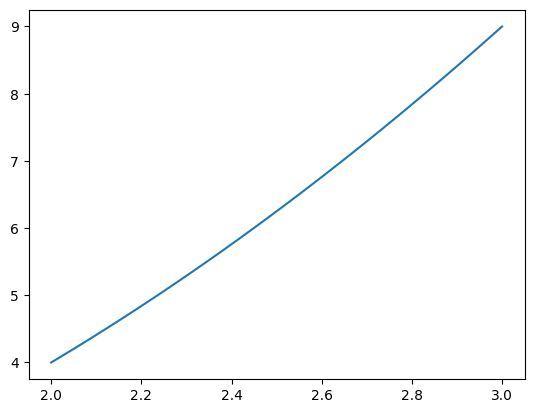

In [2]:
hermite = si.BPoly.from_derivatives([2, 3], [[4, 4, 2], [9]])

xpp = np.linspace(2,3,100)
plt.plot(xpp,hermite.__call__(xpp));

### Zadanie 1. (3 pkt)

Zaimplementować algorytm interpolacji Hermitte'a. Przetestować go na przykładowych danych wejściowych (mogą być powyższe) i porównać z działaniem funkcji z `scipy`.

In [3]:
def get_herimtte_interp(xs: np.ndarray, derrivatives: np.ndarray):
    def get_a_factors(xs: np.ndarray, derrivatives: np.ndarray):
        n = sum(len(arr) for arr in derrivatives)
        matrix_size = n

        A = np.zeros(shape=(matrix_size, matrix_size + 1))

        idx = 0

        for x_idx, x_derrivatives in enumerate(derrivatives):
            repeat = len(x_derrivatives)
            x = xs[x_idx]

            for _ in range(repeat):
                A[idx][0] = x
                A[idx][1] = derrivatives[x_idx][0]

                idx += 1


        fact = 1

        for coll in range(2, matrix_size + 1):
            derrivative_deg = coll - 1
            fact *= derrivative_deg
            x_idx = 0

            for row in range(coll - 1, matrix_size):
                # if xs in rows: row and row - 1 are equal then use derrivative[derrivative_deg] / fact(derrivative_deg)
                if A[row - derrivative_deg][0] == A[row][0]:
                    A[row][coll] = derrivatives[x_idx][derrivative_deg] / fact
                else:
                    A[row][coll] = (A[row][coll - 1] - A[row - 1][coll - 1]) / (A[row][0] - A[row - derrivative_deg][0])

                if A[row][0] != A[row - 1][0]:
                    x_idx += 1

        return np.array([A[idx][idx + 1] for idx in range(matrix_size)]), A[:, 0]

    def calc_interp_val(x, modified_xs, a_factors: np.ndarray):
        res = 0

        for i, a in enumerate(a_factors):
            factor = a


            for j in range(i):
                factor *= x - modified_xs[j]

            res += factor
        return res

    a_factors, modified_xs = get_a_factors(xs, derrivatives)

    return lambda x: calc_interp_val(x, modified_xs, a_factors)

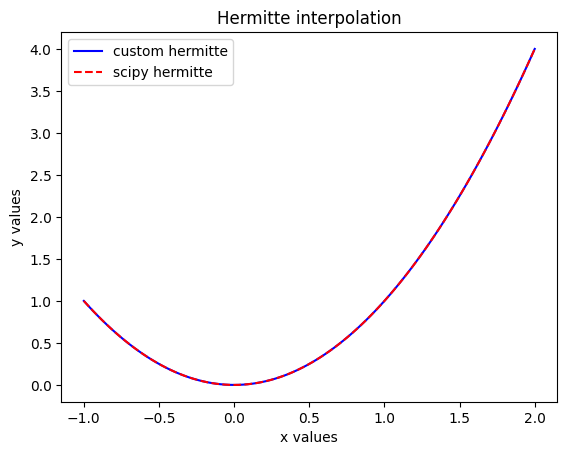

In [4]:
x1, x2 = -1, 2
x_nodes = [x1, x2]
derrivatives = [[1, -2, 2], [4, 4, 2]]
hermitte_interp = get_herimtte_interp(x_nodes, derrivatives)
vectorized_hermitte_interp = np.vectorize(hermitte_interp)
scipy_hermitte = si.BPoly.from_derivatives(x_nodes, derrivatives)

xs = np.linspace(x1, x2, 100)
y_hermitte = vectorized_hermitte_interp(xs)
y_scipy = scipy_hermitte.__call__(xs)

plt.title('Hermitte interpolation')
plt.plot(xs, y_hermitte, color = 'b', linestyle = '-', label = 'custom hermitte')
plt.plot(xs, y_scipy, color = 'r', linestyle = '--', label = 'scipy hermitte')
plt.xlabel('x values')
plt.ylabel('y values')
plt.legend()

plt.show();


### Zadanie 2. (2 pkt)
Na przykładzie dowolnej metody interpolacji zobrazować graficznie i wyjaśnić czytelnikowi tzw. efekt Rungego.

<>:26: SyntaxWarning: invalid escape sequence '\s'
<>:26: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_6612/705920561.py:26: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x, y, c = 'b', label = '$ \sin (x) / x $')


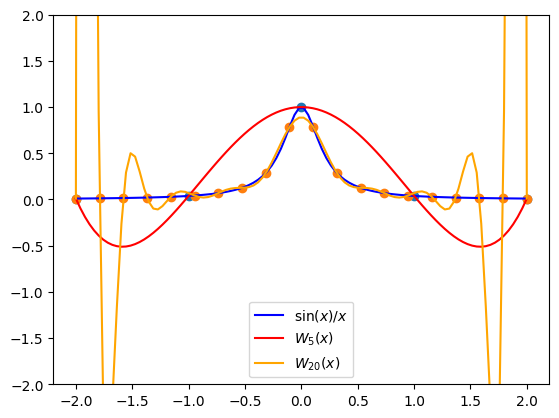

In [5]:
# func_to_interp = lambda x: np.sin(x) / x if abs(x) > 0.05 else 1
# func_to_interp = lambda x: x ** 2
func_to_interp = lambda x: 1 / (25 * x ** 2 + 1)
vectorized_func_to_interp = np.vectorize(func_to_interp)

limit = 2
x = np.linspace(-limit, limit, 100)
y = vectorized_func_to_interp(x)

# first interpolation
nodes_cnt1 = 5
x_nodes1 = np.linspace(-limit, limit, nodes_cnt1)
y_nodes1 = vectorized_func_to_interp(x_nodes1)

poly1 = si.lagrange(x_nodes1, y_nodes1)
y_lagrange1 = Polynomial(poly1.coef[::-1])(x)

# second interpolation
nodes_cnt2 = 20
x_nodes2 = np.linspace(-limit, limit, nodes_cnt2)
y_nodes2 = vectorized_func_to_interp(x_nodes2)

poly2 = si.lagrange(x_nodes2, y_nodes2)
y_lagrange2 = Polynomial(poly2.coef[::-1])(x)

plt.plot(x, y, c = 'b', label = '$ \sin (x) / x $')
plt.plot(x, y_lagrange1, c = 'r', label = f"$ W_{nodes_cnt1} (x) $")
plt.plot(x, y_lagrange2, c = 'orange', label = f"$ W_{{{nodes_cnt2}}}(x) $")
plt.scatter(x_nodes1, y_nodes1, marker = 'o')
plt.scatter(x_nodes2, y_nodes2, marker = 'o')
plt.ylim(bottom = -2, top = 2)
plt.legend()
plt.show();